### **Práctica 5: Árboles <br>Análisis de Grandes Volúmenes de Datos CI-<br>Carlos Espinoza B92786 <br>I-2022**

# How to Develop an Extra Trees Ensemble with Python

## Extra Trees Para Clasificación

In [1]:
# evaluate extra trees algorithm for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import ExtraTreesClassifier
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=4)
# define the model
model = ExtraTreesClassifier()
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.907 (0.026)


## Predicciones

In [2]:
# make predictions using extra trees for classification
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=4)
# define the model
model = ExtraTreesClassifier()
# fit the model on the whole dataset
model.fit(X, y)
# make a single prediction
row = [[-3.52169364,4.00560592,2.94756812,-0.09755101,-0.98835896,1.81021933,-0.32657994,1.08451928,4.98150546,-2.53855736,3.43500614,1.64660497,-4.1557091,-1.55301045,-0.30690987,-1.47665577,6.818756,0.5132918,4.3598337,-4.31785495]]
yhat = model.predict(row)
print('Predicted Class: %d' % yhat[0])

Predicted Class: 0


## Extra Trees Para Regresión

In [3]:
# evaluate extra trees ensemble for regression
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import ExtraTreesRegressor
# define dataset
X, y = make_regression(n_samples=1000, n_features=20, n_informative=15, noise=0.1, random_state=3)
# define the model
model = ExtraTreesRegressor()
# evaluate the model
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

MAE: -69.646 (5.254)


## Predicciones

In [4]:
# extra trees for making predictions for regression
from sklearn.datasets import make_regression
from sklearn.ensemble import ExtraTreesRegressor
# define dataset
X, y = make_regression(n_samples=1000, n_features=20, n_informative=15, noise=0.1, random_state=3)
# define the model
model = ExtraTreesRegressor()
# fit the model on the whole dataset
model.fit(X, y)
# make a single prediction
row = [[-0.56996683,0.80144889,2.77523539,1.32554027,-1.44494378,-0.80834175,-0.84142896,0.57710245,0.96235932,-0.66303907,-1.13994112,0.49887995,1.40752035,-0.2995842,-0.05708706,-2.08701456,1.17768469,0.13474234,0.09518152,-0.07603207]]
yhat = model.predict(row)
print('Prediction: %d' % yhat[0])

Prediction: 53


## Hiperparámetros de los Extra Trees

## Número de árboles

In [5]:
# explore extra trees number of trees effect on performance
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import ExtraTreesClassifier
from matplotlib import pyplot

# get the dataset
def get_dataset():
	X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=4)
	return X, y

# get a list of models to evaluate
def get_models():
	models = dict()
	# define number of trees to consider
	n_trees = [10, 50, 100, 500, 1000, 5000]
	for n in n_trees:
		models[str(n)] = ExtraTreesClassifier(n_estimators=n)
	return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	# define the evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate the model and collect the results
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores

def testTreeNumber(X, y, models, visualization = False):
	results, names, avgTreeNumber = list(), list(), list()
	for name, model in models.items():
		# evaluate the model
		scores = evaluate_model(model, X, y)
		# store the results
		results.append(scores)
		names.append(name)
		avgTreeNumber.append(mean(scores))
		# summarize the performance along the way
		print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

	if(visualization):
		# plot model performance for comparison
		pyplot.boxplot(results, labels=names, showmeans=True)
		pyplot.show()

	bestTreeNumber = int(names[avgTreeNumber.index(max(avgTreeNumber))])

	return bestTreeNumber
	
# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results

testTreeNumber(X, y, models)

>10 0.859 (0.032)
>50 0.901 (0.028)
>100 0.908 (0.025)
>500 0.912 (0.023)
>1000 0.911 (0.027)
>5000 0.914 (0.026)


5000

## Número de Features

>1 0.895 (0.025)
>2 0.901 (0.026)
>3 0.907 (0.026)
>4 0.905 (0.026)
>5 0.910 (0.024)
>6 0.907 (0.025)
>7 0.905 (0.026)
>8 0.907 (0.029)
>9 0.913 (0.023)
>10 0.908 (0.025)
>11 0.908 (0.026)
>12 0.906 (0.027)
>13 0.908 (0.027)
>14 0.904 (0.027)
>15 0.905 (0.028)
>16 0.904 (0.027)
>17 0.910 (0.022)
>18 0.907 (0.025)
>19 0.907 (0.023)
>20 0.906 (0.026)


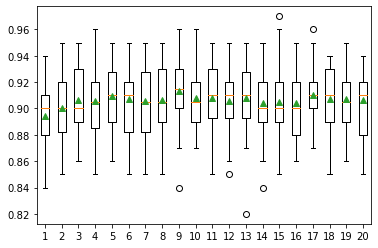

9

In [6]:
# explore extra trees number of features effect on performance
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import ExtraTreesClassifier
from matplotlib import pyplot

# get the dataset
def get_dataset():
	X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=4)
	return X, y

# get a list of models to evaluate
def get_models():
	models = dict()
	# explore number of features from 1 to 20
	for i in range(1, 21):
		models[str(i)] = ExtraTreesClassifier(max_features=i)
	return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	# define the evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate the model and collect the results
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores


def testFeatureNumber(X, y, models, visualization = False):
	
	# evaluate the models and store results
	results, names, avgScores = list(), list(), list()
	for name, model in models.items():
		# evaluate the model
		scores = evaluate_model(model, X, y)
		# store the results
		results.append(scores)
		names.append(name)
		avgScores.append(mean(scores))
		# summarize the performance along the way
		print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

	bestNumberOfFeatures = avgScores.index(max(avgScores)) + 1

	if(visualization):
		# plot model performance for comparison
		pyplot.boxplot(results, labels=names, showmeans=True)
		pyplot.show()

	return bestNumberOfFeatures

# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()

testFeatureNumber(X, y, models, True)

## Muestras mínimas por Split

>2 0.907 (0.028)
>3 0.909 (0.027)
>4 0.904 (0.024)
>5 0.907 (0.026)
>6 0.901 (0.024)
>7 0.902 (0.025)
>8 0.902 (0.024)
>9 0.896 (0.027)
>10 0.895 (0.031)
>11 0.890 (0.025)
>12 0.886 (0.029)
>13 0.892 (0.025)
>14 0.890 (0.027)


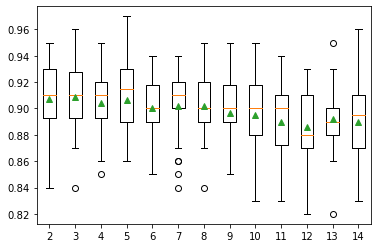

Num Splits:  3


In [7]:
# explore extra trees minimum number of samples for a split effect on performance
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import ExtraTreesClassifier
from matplotlib import pyplot

# get the dataset
def get_dataset():
	X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=4)
	return X, y

# get a list of models to evaluate
def get_models():
	models = dict()
	# explore the number of samples per split from 2 to 14
	for i in range(2, 15):
		models[str(i)] = ExtraTreesClassifier(min_samples_split=i)
	return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	# define the evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate the model and collect the results
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores

def testSamplesPerSplit(X, y, models, visualization = False):
	# evaluate the models and store results
	results, names, avgNumSamples = list(), list(), list()
	for name, model in models.items():
		# evaluate the model
		scores = evaluate_model(model, X, y)
		# store the results
		results.append(scores)
		names.append(name)
		avgNumSamples.append(mean(scores))
		# summarize the performance along the way
		print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

	bestSamplesNum = avgNumSamples.index(max(avgNumSamples)) + 2
	# plot model performance for comparison

	if(visualization):
		pyplot.boxplot(results, labels=names, showmeans=True)
		pyplot.show()

	return bestSamplesNum

# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()

print("Num Splits: ", testSamplesPerSplit(X, y, models, True))

# Comentarios y Resumen

## Extra Trees (Extremely Randomized Trees)

Es un algoritmo de conjuntos utilizado en el aprendizaje de máquina para hacer predicciones utilizando múltiples árboles de decisión.

- Es fácil uso por la poca cantidad de hiperparámetros
- Heurísticas sensibles
- Está asociado a otros algoritmos como Random Forest o Bootstraping

# Comentarios de los parámetros

Mediante el uso de funciones podemos hacer un algoritmo que haga pruebas para determinar cual es la mejor combinación del árbol para obtener el resultado más acertado

### Estructuración del código

In [15]:
# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()

avgNumTrees, avgNumFeatures, avgNumSample = list(), list(), list()


for i in range(0, 3):
	print("Iteration:", i)
	avgNumTrees.append(testTreeNumber(X, y, models))
	avgNumFeatures.append(testFeatureNumber(X, y, models))
	avgNumSample.append(testSamplesPerSplit(X, y, models))

print(avgNumTrees, avgNumFeatures, avgNumSample)

Iteration: 0
>2 0.907 (0.026)
>3 0.904 (0.025)
>4 0.905 (0.028)
>5 0.901 (0.028)
>6 0.906 (0.025)
>7 0.905 (0.024)
>8 0.900 (0.029)
>9 0.896 (0.027)
>10 0.895 (0.034)
>11 0.894 (0.028)
>12 0.897 (0.027)
>13 0.888 (0.031)
>14 0.888 (0.028)
>2 0.912 (0.023)
>3 0.908 (0.025)
>4 0.905 (0.027)
>5 0.904 (0.026)
>6 0.903 (0.029)
>7 0.901 (0.027)
>8 0.900 (0.030)
>9 0.900 (0.025)
>10 0.900 (0.028)
>11 0.889 (0.029)
>12 0.891 (0.026)
>13 0.885 (0.026)
>14 0.886 (0.029)
>2 0.910 (0.027)
>3 0.902 (0.026)
>4 0.905 (0.024)
>5 0.901 (0.027)
>6 0.899 (0.029)
>7 0.899 (0.031)
>8 0.896 (0.028)
>9 0.898 (0.027)
>10 0.896 (0.033)
>11 0.893 (0.029)
>12 0.896 (0.026)
>13 0.894 (0.022)
>14 0.886 (0.029)
Iteration: 1
>2 0.909 (0.028)
>3 0.907 (0.027)
>4 0.908 (0.025)
>5 0.906 (0.028)
>6 0.905 (0.027)
>7 0.903 (0.023)
>8 0.895 (0.024)
>9 0.900 (0.027)
>10 0.896 (0.024)
>11 0.897 (0.025)
>12 0.888 (0.028)
>13 0.889 (0.030)
>14 0.888 (0.027)
>2 0.908 (0.031)
>3 0.906 (0.027)
>4 0.905 (0.027)
>5 0.906 (0.025)
>6

Lastimosamente la prueba no funcionó probablemente por un error mío o del notebook. El objetivo era obtener un estimado de cual sería la mejor configuración para el modelo, tomando en cuenta el promedio de N iteraciones para los diferentes hiperparámetros.

Sin embargo, como se pudo observar en las pruebas del ejercicio, no siempre más es mejor. La cantidad de features, por ejemplo, obtuvo altos valores de acertividad tanto con pocas (2) como con casi el máximo programado (17), por lo que sería incorrecto asumir que entre más features se tomen en cuenta, más acertivo sería nuestro modelo. También, otro ejemplo claro es la cantidad de árboles. En este caso el modelo con 5000 árboles tomaba un tiempo considerable en comparación a las demás configuraciones, pero, a la hora de ver resultados, se demostró que tuvo mejor rendimiento el modelo con solo 500 árboles.